# Lab: Predicting Digits with a Neural Net

## About MNIST Data

MNIST is a widely used dataset of hand written digits.

<img src="../assets/images/mnist-1.jpeg" />

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)


Running in Google COLAB :  False


## Step 1: Download data

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# backup
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

11493376/11490434 [==============================] - 2s 0us/step
train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2 : Data Exploration

Displaying train index =  42402
train label [42402] = 0 
------------ raw data for train_image[42402] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  72 247 254 255 221   3   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  73 244 254 238 237 254  74   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4 217 254 110   4   0 211  68  25
   25   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 142 254 161   6   0   0  25 190 2

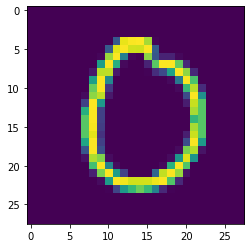

In [4]:
## Run this cell a few times to randomly display some digit data
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

## Step 3: Shape data

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

## Step 4: Create model

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:30%"/>

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


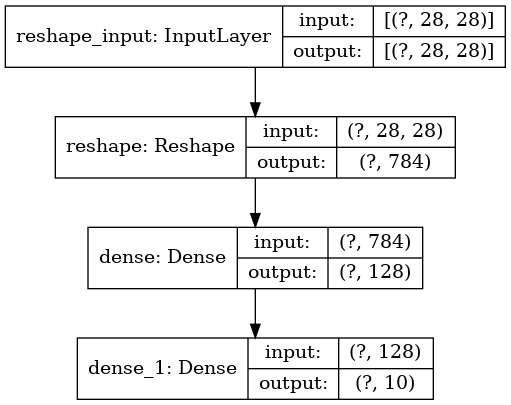

In [6]:
## Model 1

model = tf.keras.models.Sequential([
            keras.layers.Reshape(
              target_shape=(28 * 28,), input_shape=(28, 28)
              ),
            tf.keras.layers.Dense(units=128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
            ])


model.compile(
  optimizer=tf.keras.optimizers.Adam(),  # 'adam'
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

print (model.summary())
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [7]:
## Model 2

# model = keras.Sequential([
#     keras.layers.Reshape(
#       target_shape=(28 * 28,), input_shape=(28, 28)
#     ),
#     keras.layers.Dense(
#       units=256, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=192, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=128, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=10, activation=tf.nn.softmax #'softmax'
#     )
# ])

# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),  # 'adam'
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])

# print (model.summary())

## Step 5 - Setup Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'mnist1' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)

Saving TB logs to :  /tmp/tensorboard-logs/mnist1/2020-02-05--18-47-56


## Step 6: Training the model


In [9]:
%%time

epochs=10
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

print ("training done.")

training starting ...
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 15s 305us/sample - loss: 0.2844 - accuracy: 0.9186 - val_loss: 0.1677 - val_accuracy: 0.9492
Epoch 2/10
48000/48000 [==============================] - 12s 259us/sample - loss: 0.1289 - accuracy: 0.9620 - val_loss: 0.1198 - val_accuracy: 0.9652
Epoch 3/10
48000/48000 [==============================] - 10s 201us/sample - loss: 0.0894 - accuracy: 0.9734 - val_loss: 0.1154 - val_accuracy: 0.9644
Epoch 4/10
48000/48000 [==============================] - 12s 247us/sample - loss: 0.0681 - accuracy: 0.9788 - val_loss: 0.0983 - val_accuracy: 0.9690
Epoch 5/10
48000/48000 [==============================] - 8s 171us/sample - loss: 0.0521 - accuracy: 0.9843 - val_loss: 0.0822 - val_accuracy: 0.9743
Epoch 6/10
48000/48000 [==============================] - 9s 189us/sample - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0873 - val_accuracy: 0.9738
Epoch 7/10
48000/48000 [

## Step 7 : See Training History

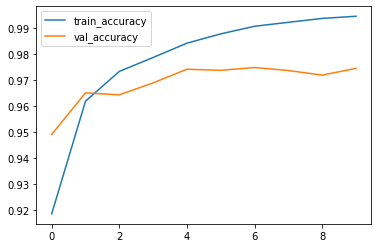

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [11]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 2.29 s, sys: 2.62 s, total: 4.91 s
Wall time: 1.41 s


random index =  7139
test_label[7139] = 0.  So the number is 0
prediction of test_image[7139] = [ 1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]
max softmax output =  0.9999999
index of max softmax output = 0.  So the prediction is same (0)


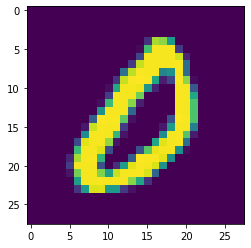

In [12]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.084
Metric : accuracy = 0.978


### 9.2 - Confusion Matrix

In [14]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  1.000  0.000  0.000]
prediction 1 :  [ 0.000  0.000  1.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000]


In [15]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  7
prediction2 1 :  2


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[ 972,    0,    1,    1,    1,    2,    1,    1,    1,    0],
       [   0, 1123,    5,    0,    0,    1,    2,    0,    3,    1],
       [   6,    0, 1011,    1,    1,    0,    3,    6,    4,    0],
       [   0,    1,    3,  990,    1,    3,    0,    2,    2,    8],
       [   2,    1,    2,    0,  957,    0,    3,    2,    0,   15],
       [   3,    0,    0,    9,    2,  857,    4,    2,    8,    7],
       [   8,    3,    0,    0,    4,    3,  936,    0,    4,    0],
       [   0,    5,    5,    8,    0,    0,    0,  996,    2,   12],
       [   5,    0,    3,    6,    4,    3,    1,    1,  944,    7],
       [   2,    2,    0,    3,    4,    3,    0,    5,    0,  990]])

[]

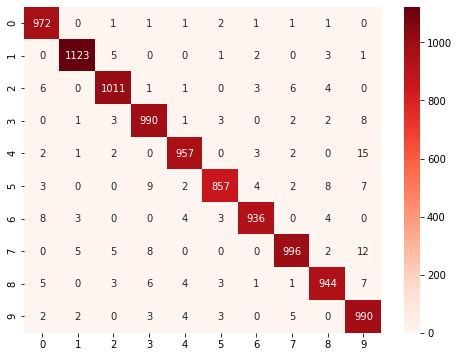

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics Calculated from Confusion Matrix

In [19]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9828109201213346,
       'precision': 0.9739478957915831,
       'recall': 0.9918367346938776,
       'support': 980},
 '1': {'f1-score': 0.9894273127753304,
       'precision': 0.9894273127753304,
       'recall': 0.9894273127753304,
       'support': 1135},
 '2': {'f1-score': 0.9806013579049466,
       'precision': 0.9815533980582525,
       'recall': 0.9796511627906976,
       'support': 1032},
 '3': {'f1-score': 0.9763313609467457,
       'precision': 0.9724950884086444,
       'recall': 0.9801980198019802,
       'support': 1010},
 '4': {'f1-score': 0.9785276073619631,
       'precision': 0.9825462012320328,
       'recall': 0.9745417515274949,
       'support': 982},
 '5': {'f1-score': 0.971655328798186,
       'precision': 0.9827981651376146,
       'recall': 0.9607623318385651,
       'support': 892},
 '6': {'f1-score': 0.9811320754716981,
       'precision': 0.9852631578947368,
       'recall': 0.9770354906054279,
       'support': 958},
 '7': {'f1-score':

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 50
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?

**2 - Build a deeper neural net** 
- IN Step-4, uncomment and use 'model-2'.  This is a wider/deeper model
- Rerun the notebook again
- did the accuracy improve?
- how much the training time go up?